Files already downloaded and verified
[{0: 248, 1: 219, 2: 0, 3: 2, 4: 22, 5: 25, 6: 27, 7: 243, 8: 0, 9: 246}, {0: 20, 1: 25, 2: 10, 3: 16, 4: 31, 5: 27, 6: 29, 7: 24, 8: 16, 9: 23}, {0: 140, 1: 135, 2: 82, 3: 99, 4: 0, 5: 2, 6: 1, 7: 134, 8: 76, 9: 138}, {0: 31, 1: 25, 2: 2, 3: 8, 4: 73, 5: 87, 6: 88, 7: 28, 8: 5, 9: 29}, {0: 4, 1: 13, 2: 345, 3: 321, 4: 14, 5: 10, 6: 14, 7: 2, 8: 347, 9: 4}, {0: 1, 1: 5, 2: 7, 3: 9, 4: 22, 5: 30, 6: 30, 7: 5, 8: 14, 9: 4}, {0: 3, 1: 9, 2: 36, 3: 57, 4: 228, 5: 243, 6: 242, 7: 7, 8: 45, 9: 5}, {0: 63, 1: 72, 2: 19, 3: 11, 4: 14, 5: 22, 6: 16, 7: 66, 8: 10, 9: 53}, {0: 30, 1: 28, 2: 79, 3: 78, 4: 73, 5: 61, 6: 69, 7: 37, 8: 92, 9: 33}, {0: 88, 1: 102, 2: 16, 3: 7, 4: 47, 5: 33, 6: 48, 7: 77, 8: 8, 9: 92}, {0: 11, 1: 6, 2: 0, 3: 0, 4: 35, 5: 47, 6: 40, 7: 7, 8: 0, 9: 4}, {0: 12, 1: 19, 2: 258, 3: 229, 4: 19, 5: 25, 6: 25, 7: 20, 8: 247, 9: 16}, {0: 1, 1: 1, 2: 17, 3: 9, 4: 0, 5: 0, 6: 2, 7: 1, 8: 14, 9: 1}, {0: 1, 1: 2, 2: 9, 3: 5, 4: 237, 5: 226, 6: 2

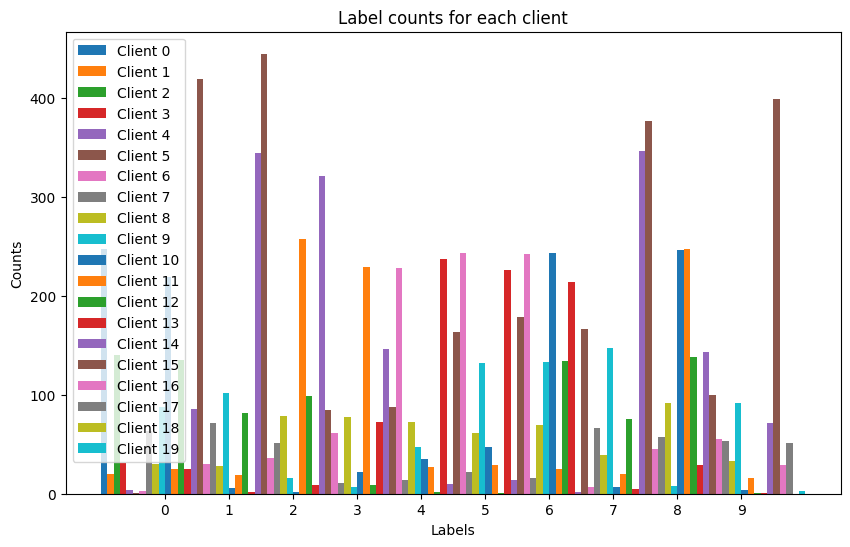

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from generate_data import clients_label_count


clients_label_counts=clients_label_count()

print(clients_label_counts)

# Number of clients
n_clients = len(clients_label_counts)

# Create an array with the labels (assuming CIFAR10)
labels = np.arange(10)

# Create a new figure
plt.figure(figsize=(10, 6))

# For each client
for i, label_counts in enumerate(clients_label_counts):
    # Get the counts for each label
    counts = [label_counts[label] for label in labels]

    # Generate a bar plot for this client
    plt.bar(labels + 0.1 * i, counts, width=0.1, label=f'Client {i}')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label counts for each client')
plt.xticks(labels + 0.1 * (n_clients - 1) / 2, labels)  # center the xticks
plt.legend()

# Show the plot
plt.show()


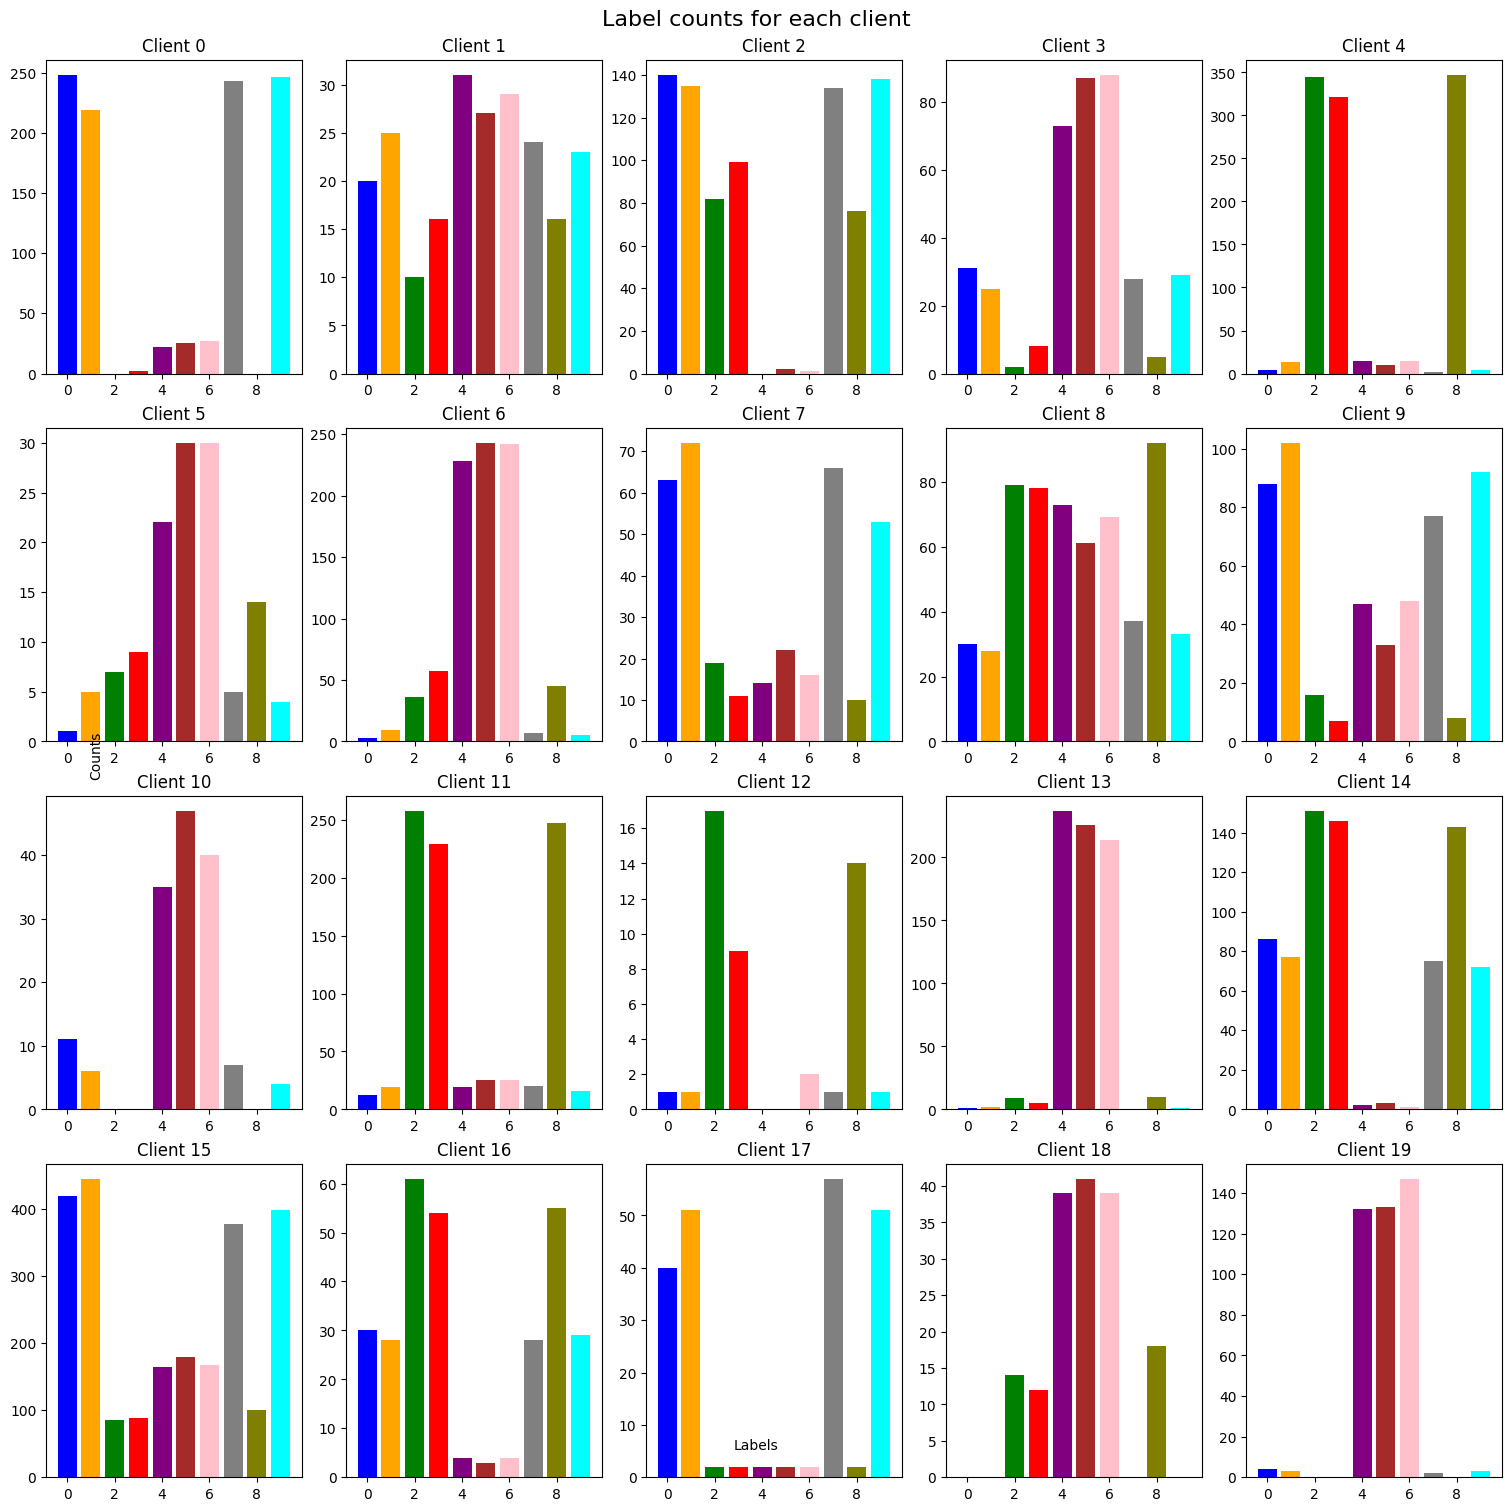

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Number of clients
n_clients = len(clients_label_counts)

# Create an array with the labels
labels = np.arange(10)

# Create a color map
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# Calculate the number of rows and columns for the subplots
n_rows = int(np.sqrt(n_clients))
n_cols = n_clients // n_rows 
if n_rows * n_cols < n_clients:
    n_cols += 1

# Create a new figure and axes
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 15), constrained_layout=True)

# Remove extra subplots
if n_rows * n_cols > n_clients:
    for i in range(n_clients, n_rows * n_cols):
        fig.delaxes(ax.flatten()[i])

# For each client
for i, label_counts in enumerate(clients_label_counts):
    # Get the counts for each label
    counts = [label_counts[label] for label in labels]

    # Generate a bar plot for this client
    ax.flatten()[i].bar(labels, counts, color=colors)
    ax.flatten()[i].set_title(f'Client {i}')

# Set common labels
fig.text(0.5, 0.04, 'Labels', ha='center', va='center')
fig.text(0.06, 0.5, 'Counts', ha='center', va='center', rotation='vertical')
fig.suptitle('Label counts for each client', fontsize=16)

# Show the plot
plt.show()


(-0.04855296857295743,
 1.0491278560034991,
 -0.04967837473791374,
 1.047987773982419)

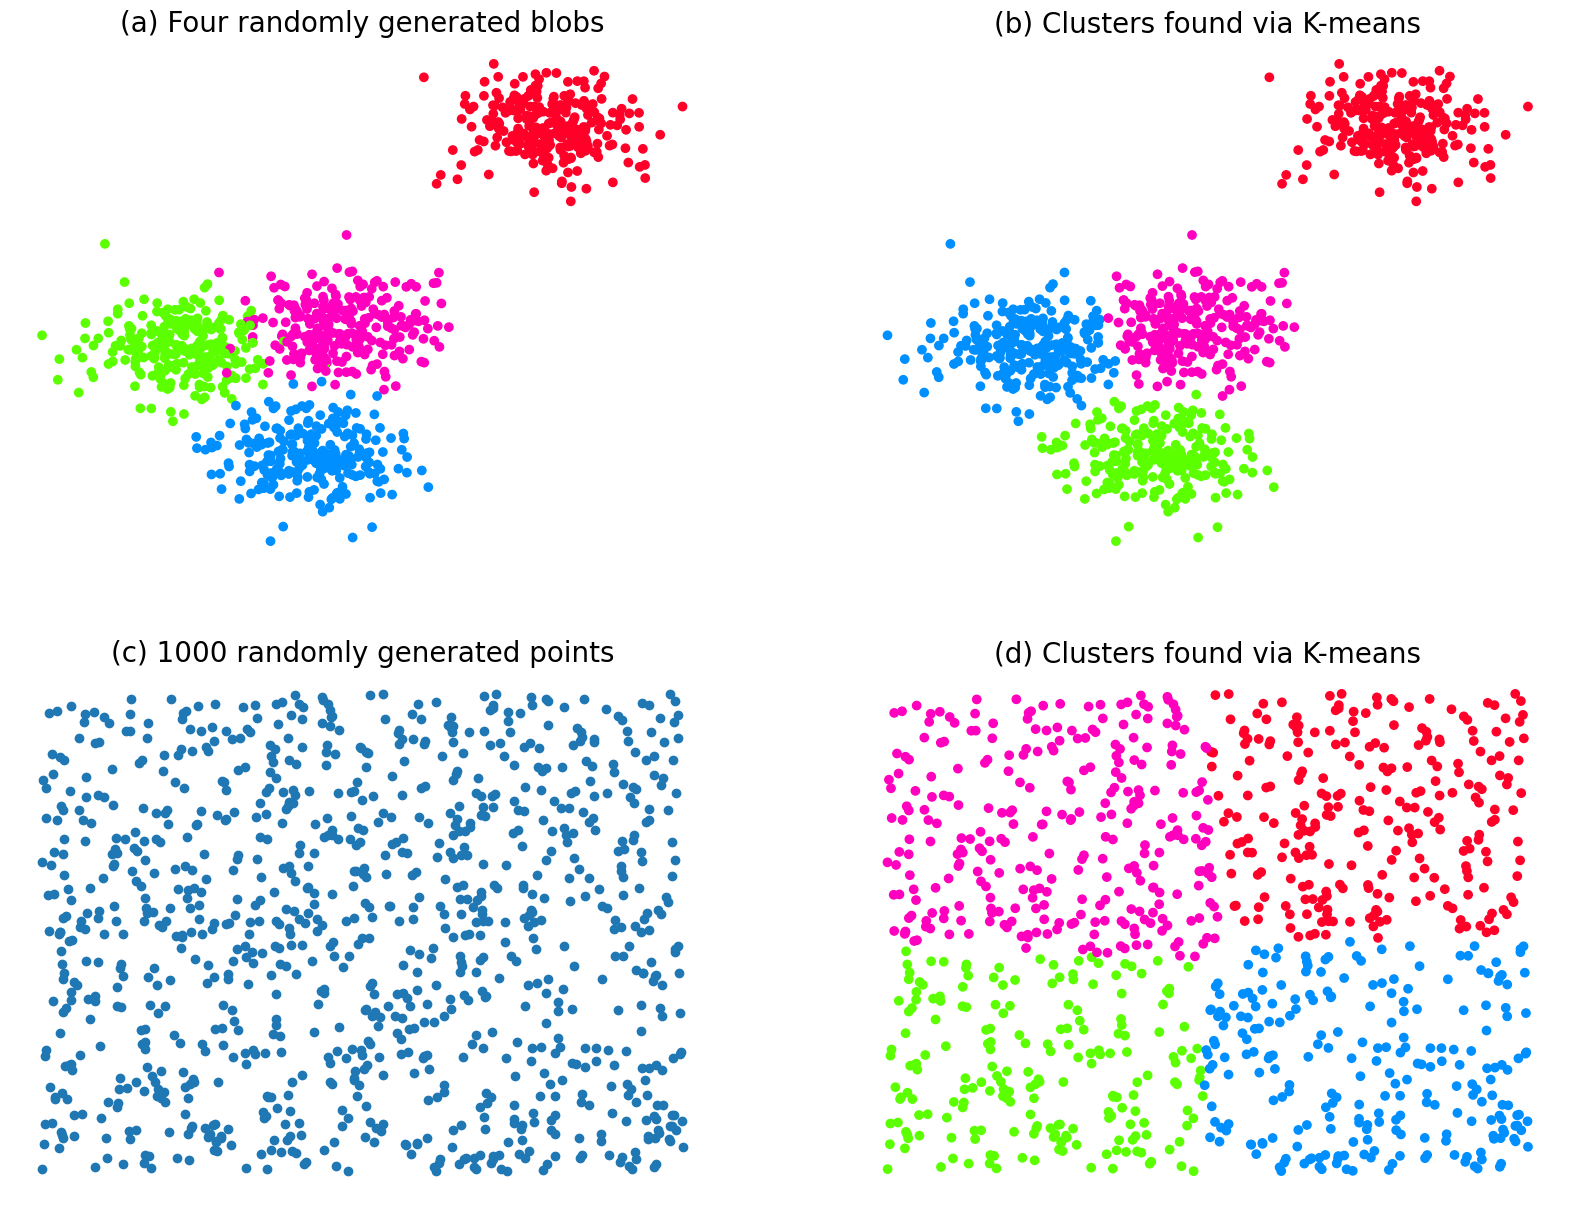

In [9]:
%matplotlib inline
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt 

 
n_data = 1000 
seed = 1 
n_clusters = 4 
 
# 产生高斯随机数，运行K-均值
blobs, blob_labels = make_blobs(n_samples=n_data, n_features=2,centers=n_clusters, random_state=seed) 

clusters_blob = KMeans(n_init = 10,n_clusters=n_clusters, random_state=seed).fit_predict(blobs) 
 
# 产生随机数，运行K-均值
uniform = np.random.rand(n_data, 2) 
clusters_uniform = KMeans(n_init = 10,n_clusters=n_clusters, random_state=seed).fit_predict(uniform) 
 
# 使用Matplotlib进行结果可视化
figure = plt.figure(figsize=(20, 15)) 
plt.subplot(221) 
plt.scatter(blobs[:, 0], blobs[:, 1], c=blob_labels, cmap='gist_rainbow') 
plt.title("(a) Four randomly generated blobs", fontsize=20) 
plt.axis('off') 
 
plt.subplot(222) 
plt.scatter(blobs[:, 0], blobs[:, 1], c=clusters_blob, cmap='gist_rainbow') 
plt.title("(b) Clusters found via K-means", fontsize=20) 
plt.axis('off') 
 
plt.subplot(223) 
plt.scatter(uniform[:, 0], uniform[:, 1]) 
plt.title("(c) 1000 randomly generated points", fontsize=20) 
plt.axis('off') 
 
plt.subplot(224) 
plt.scatter(uniform[:, 0], uniform[:, 1], c=clusters_uniform, cmap='gist_rainbow') 
plt.title("(d) Clusters found via K-means", fontsize=20) 
plt.axis('off')